In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy 
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

warnings.filterwarnings('ignore') # prevents future version warnings

# load the data into a pandas dataframe here
dataset = pd.read_csv('dataset.csv')
dataset.replace(inplace = True,to_replace='Dropout',value=0)
dataset.replace(inplace = True,to_replace='Enrolled',value=1)
dataset.replace(inplace = True,to_replace='Graduate',value=2)
# splitting Target into three separate columns for dropouts, enrolled and graduated
dataset = pd.get_dummies(dataset, columns=['Target'])
# Have a look at the data
dataset.info(verbose=True)
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mothers qualification                           4424 non-null   int64  
 8   Fathers qualification                           4424 non-null   int64  
 9   Mothers occupation                       

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mothers qualification,Fathers qualification,Mothers occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_0,Target_1,Target_2
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,0,0,1
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,0,0,1
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,0,0,1


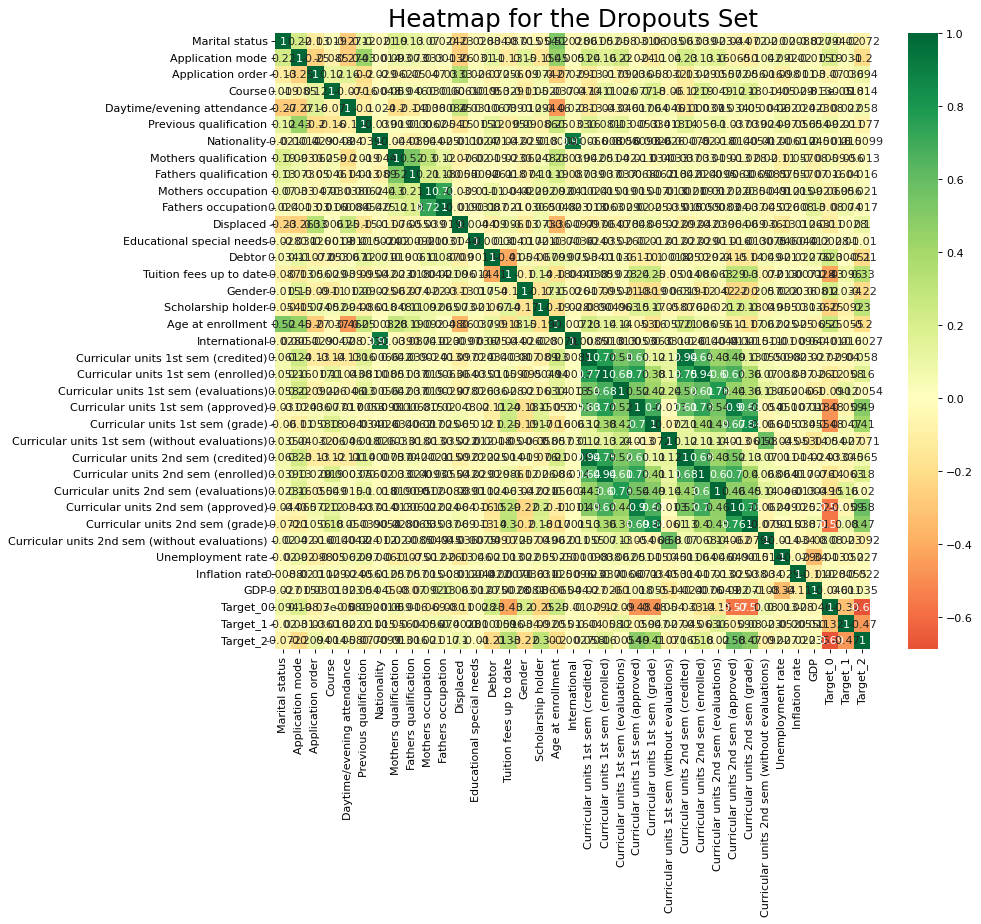

In [80]:
plt.figure(figsize=(12,10), dpi= 80) 
sns.heatmap(dataset.corr(), xticklabels=dataset.corr().columns, yticklabels=dataset.corr().columns, cmap='RdYlGn', center=0, annot=True) 
plt.title('Heatmap for the Dropouts Set', fontsize = 22) 

plt.show() 

In [85]:
# sampling
total=len(dataset)
nb_dropout=dataset['Target_0'].sum()

# sampling number of dropouts from non dropouts
dataset_dropout=dataset.loc[dataset['Target_0']==1]
dataset_dont=dataset.loc[dataset['Target_0']==0].sample(nb_dropout)

# concatenating nresampled dataset
resampled_dataset=pd.concat((dataset_dropout, dataset_dont))

X=resampled_dataset[['Fathers qualification', 'Mothers qualification', 'Mothers occupation', 'Fathers occupation',
             'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']]
y=resampled_dataset['Target_0']


In [ ]:
def forward_selection(X, y, threshold):
    selected_features = []
    best_accuracy = 0
    
    # Splitting the dataset into train and test sets
    X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)
    X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)
    
    while True:
        best_feature = None
        for feature in X_train.columns:
            if feature in selected_features:
                continue
            
            current_features = selected_features + [feature]
            
            svm = SVC(probability=True)
            svm.fit(X_train[current_features], y_train)
            
            y_pred = svm.predict(X_valid[current_features])
            accuracy = accuracy_score(y_valid, y_pred)
            
            if accuracy - best_accuracy > threshold:
                best_accuracy = accuracy
                best_feature = feature
        
        if best_feature is None:
            break
        
        selected_features.append(best_feature)
    
    return selected_features, svm, X_test



threshold = 0.01  # Specify the threshold for accuracy improvement
selected_features, svm_model, X_test = forward_selection(X, y, threshold)
print("Selected features:", selected_features)

y_pred = svm_model.predict(X_test)

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


In [96]:
def forward_selection(X, y, threshold):
    selected_features = []
    best_accuracy = 0
    
    while True:
        best_feature = None
        for feature in X.columns:
            if feature in selected_features:
                continue
            
            current_features = selected_features + [feature]
            # Splitting the dataset into train and test sets
            X_train, X_remaining, y_train, y_remaining = train_test_split(X[current_features], y, test_size=0.2, random_state=42)
            X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)
            
            svm = SVC(probability=True)
            svm.fit(X, y)
            
            y_pred = svm.predict(X)
            accuracy = accuracy_score(y_valid, y_pred)
            
            if accuracy - best_accuracy > threshold:
                best_accuracy = accuracy
                best_feature = feature
        
        if best_feature is None:
            break
        
        selected_features.append(best_feature)
    
    return selected_features, svm, X_test

# Example usage:
# y = dataset['Target_0']
# X = dataset[['Fathers qualification', 'Mothers qualification', 'Mothers occupation', 'Fathers occupation',
#              'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']]

threshold = 0.01  # Specify the threshold for accuracy improvement
selected_features, svm_model, X_test = forward_selection(X, y, threshold)
print("Selected features:", selected_features)


# # Balancing the training data using undersampling
# undersampler = RandomUnderSampler(random_state=0)
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Training the SVM model on the balanced training data
# svm_model.fit(X_train_resampled, y_train_resampled)

# Predicting on the test set
y_pred = svm_model.predict(X_test)

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

ValueError: Found input variables with inconsistent numbers of samples: [442, 443]

In [94]:
cm2 = confusion_matrix(X_train, y_train)
print("Confusion Matrix:")
print(cm2)

Confusion Matrix:
[[  59  363]
 [2340  777]]


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

def forward_selection(X, y, threshold):
    selected_features = []
    best_accuracy = 0
    
    while True:
        best_feature = None
        for feature in X.columns:
            if feature in selected_features:
                continue
            
            current_features = selected_features + [feature]
            X_train, X_remaining, y_train, y_remaining = train_test_split(X[current_features], y, test_size=0.2, random_state=42)
            X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)
            
            undersampler = RandomUnderSampler(random_state=0)
            X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
            
            svm = SVC(probability=True)
            svm.fit(X_train_resampled, y_train_resampled)
            
            y_pred = svm.predict(X_valid)
            accuracy = accuracy_score(y_valid, y_pred)
            
            if accuracy - best_accuracy > threshold:
                best_accuracy = accuracy
                best_feature = feature
        
        if best_feature is None:
            break
        
        selected_features.append(best_feature)
    
    return selected_features, svm

# Example usage:
y = dataset['Target_0']
X = dataset[['Fathers qualification', 'Mothers qualification', 'Mothers occupation', 'Fathers occupation',
             'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']]

threshold = 0.01  # Specify the threshold for accuracy improvement
selected_features, svm_model = forward_selection(X, y, threshold)
print("Selected features:", selected_features)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Balancing the training data using undersampling
undersampler = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Balancing the test data using undersampling
X_test_resampled, y_test_resampled = undersampler.fit_resample(X_test, y_test)

# Training the SVM model on the balanced training data
svm_model.fit(X_train_resampled, y_train_resampled)

# Predicting on the balanced test set
y_pred = svm_model.predict(X_test_resampled)

# Generating confusion matrix
cm = confusion_matrix(y_test_resampled, y_pred)
print("Confusion Matrix:")
print(cm)

Selected features: ['Tuition fees up to date', 'Mothers qualification']
Confusion Matrix:
[[306  10]
 [198 118]]


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.inspection import permutation_importance

def forward_selection(X, y, threshold):
    selected_features = []
    best_accuracy = 0
    
    while True:
        best_feature = None
        for feature in X.columns:
            if feature in selected_features:
                continue
            
            current_features = selected_features + [feature]
            X_train, X_remaining, y_train, y_remaining = train_test_split(X[current_features], y, test_size=0.2, random_state=42)
            X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)
            
            undersampler = RandomUnderSampler(random_state=0)
            X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
            
            svm = SVC(probability=True)
            svm.fit(X_train_resampled, y_train_resampled)
            
            y_pred = svm.predict(X_valid)
            accuracy = accuracy_score(y_valid, y_pred)
            
            if accuracy - best_accuracy > threshold:
                best_accuracy = accuracy
                best_feature = feature
        
        if best_feature is None:
            break
        
        selected_features.append(best_feature)
    
    return selected_features, svm

y = dataset['Target_0']
X = dataset[['Fathers qualification', 'Mothers qualification', 'Mothers occupation', 'Fathers occupation',
             'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']]

threshold = 0.01  # Specify the threshold for accuracy improvement
selected_features, svm_model = forward_selection(X, y, threshold)
print("Selected features:", selected_features)
print()

# Splitting the dataset into train, validation, and test sets (80/10/10)
X_train, X_remaining, y_train, y_remaining = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Balancing the training data using undersampling
undersampler = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Training the SVM model on the balanced training data
svm_model.fit(X_train_resampled, y_train_resampled)

# Evaluating the accuracy of the model on the validation set
y_valid_pred = svm_model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print()

# Evaluating the accuracy of the model on the test set
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print()

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Selected features: ['Tuition fees up to date', 'Mothers qualification']

Validation Accuracy: 0.751131221719457
Validation Precision: 0.8493150684931506
Validation Recall: 0.38509316770186336

Test Accuracy: 0.7584650112866818
Test Precision: 0.875
Test Recall: 0.36129032258064514

Confusion Matrix:
[[280   8]
 [ 99  56]]


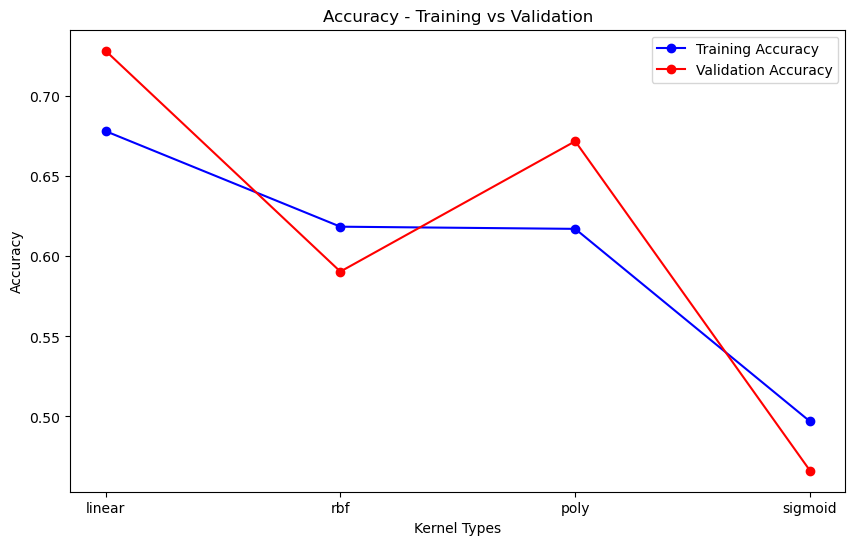

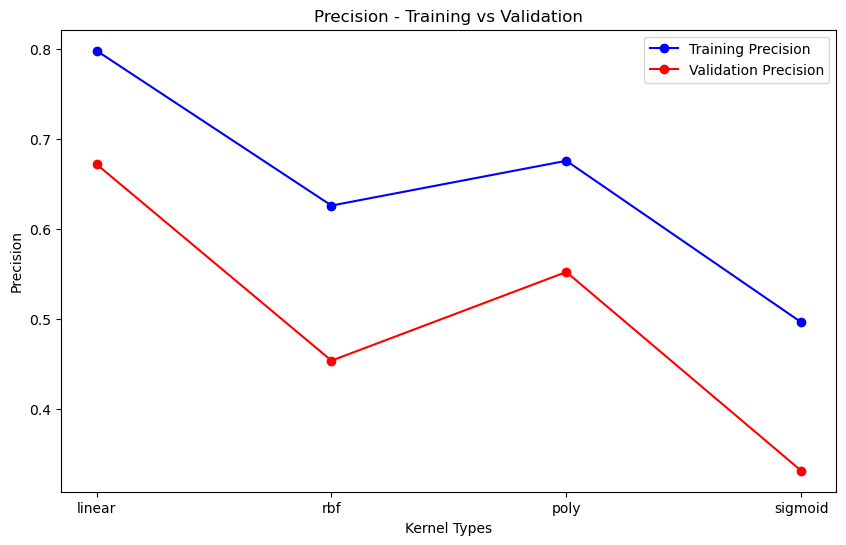

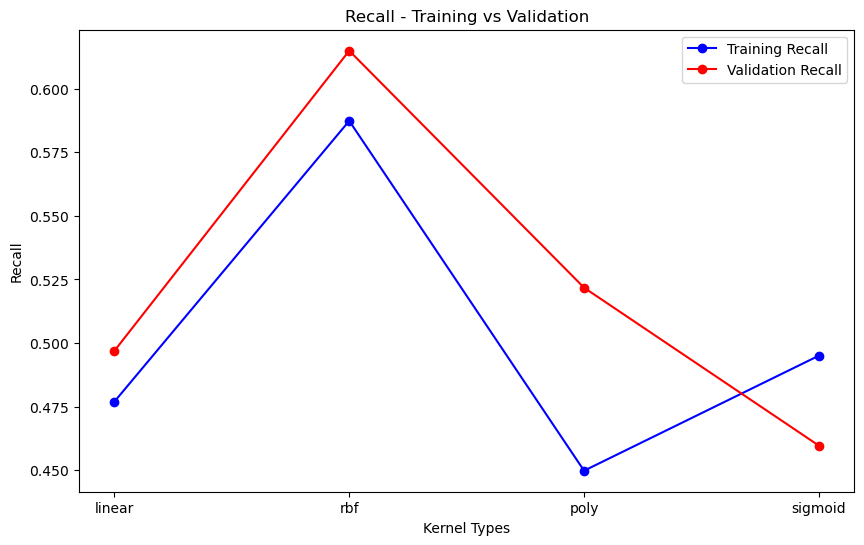

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler

def evaluate_performance(X_train, y_train, X_valid, y_valid, kernel):
    undersampler = RandomUnderSampler(random_state=0)
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

    svm = SVC(kernel=kernel, C=1, probability=True)
    svm.fit(X_train_resampled, y_train_resampled)

    y_train_pred = svm.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_precision = precision_score(y_train_resampled, y_train_pred)
    train_recall = recall_score(y_train_resampled, y_train_pred)

    y_valid_pred = svm.predict(X_valid)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    valid_precision = precision_score(y_valid, y_valid_pred)
    valid_recall = recall_score(y_valid, y_valid_pred)

    return train_accuracy, train_precision, train_recall, valid_accuracy, valid_precision, valid_recall

y = dataset['Target_0']
X = dataset[['Fathers qualification', 'Mothers qualification', 'Mothers occupation', 'Fathers occupation',
             'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']]

# Splitting the dataset into train, validation, and test sets (80/10/10)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
accuracy_train = []
accuracy_valid = []
precision_train = []
precision_valid = []
recall_train = []
recall_valid = []

for kernel in kernels:
    train_acc, train_prec, train_rec, valid_acc, valid_prec, valid_rec = evaluate_performance(X_train, y_train, X_valid, y_valid, kernel)
    accuracy_train.append(train_acc)
    accuracy_valid.append(valid_acc)
    precision_train.append(train_prec)
    precision_valid.append(valid_prec)
    recall_train.append(train_rec)
    recall_valid.append(valid_rec)

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(kernels, accuracy_train, marker='o', label='Training Accuracy', color='blue')
plt.plot(kernels, accuracy_valid, marker='o', label='Validation Accuracy', color='red')
plt.xlabel('Kernel Types')
plt.ylabel('Accuracy')
plt.title('Accuracy - Training vs Validation')
plt.legend()
plt.show()

# Plotting precision
plt.figure(figsize=(10, 6))
plt.plot(kernels, precision_train, marker='o', label='Training Precision', color='blue')
plt.plot(kernels, precision_valid, marker='o', label='Validation Precision', color='red')
plt.xlabel('Kernel Types')
plt.ylabel('Precision')
plt.title('Precision - Training vs Validation')
plt.legend()
plt.show()

# Plotting recall
plt.figure(figsize=(10, 6))
plt.plot(kernels, recall_train, marker='o', label='Training Recall', color='blue')
plt.plot(kernels, recall_valid, marker='o', label='Validation Recall', color='red')
plt.xlabel('Kernel Types')
plt.ylabel('Recall')
plt.title('Recall - Training vs Validation')
plt.legend()
plt.show()


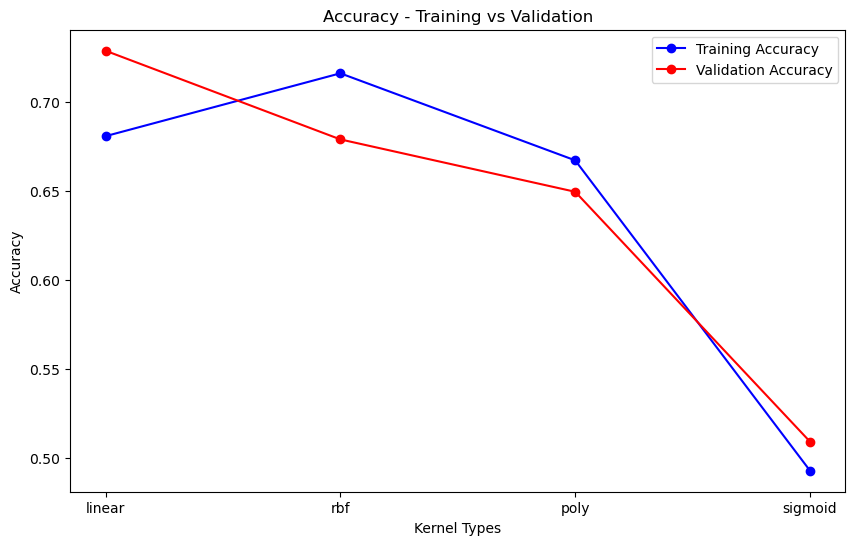

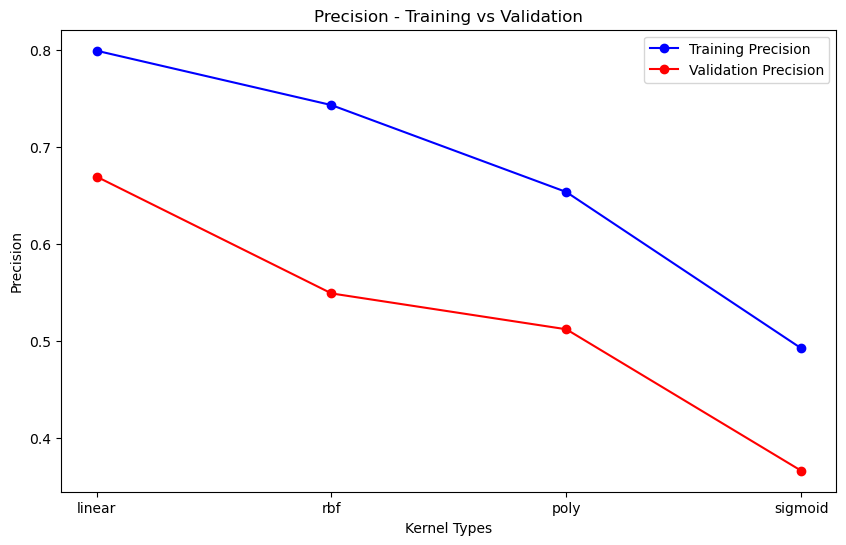

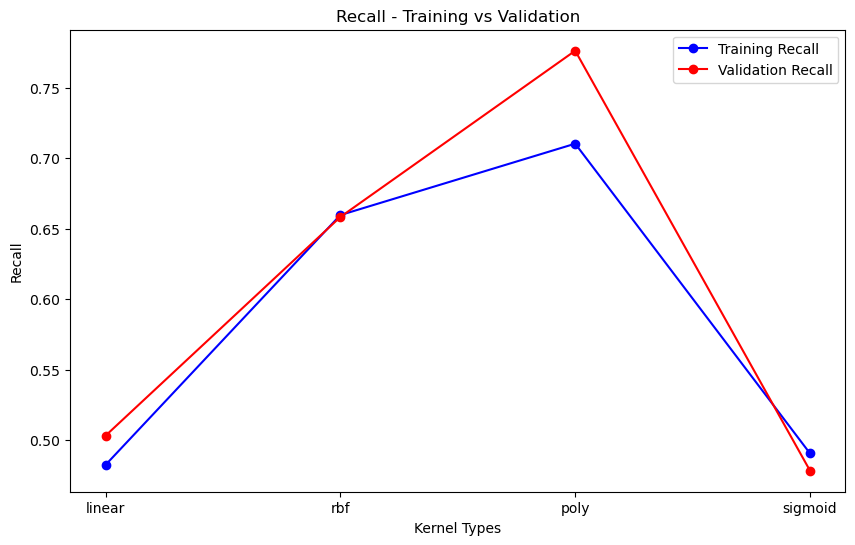

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler

def evaluate_performance(X_train, y_train, X_valid, y_valid, kernel):
    undersampler = RandomUnderSampler(random_state=0)
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

    svm = SVC(kernel=kernel, C=10, gamma= 0.01, probability=True)
    svm.fit(X_train_resampled, y_train_resampled)

    y_train_pred = svm.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_precision = precision_score(y_train_resampled, y_train_pred)
    train_recall = recall_score(y_train_resampled, y_train_pred)

    y_valid_pred = svm.predict(X_valid)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    valid_precision = precision_score(y_valid, y_valid_pred)
    valid_recall = recall_score(y_valid, y_valid_pred)

    return train_accuracy, train_precision, train_recall, valid_accuracy, valid_precision, valid_recall

y = dataset['Target_0']
X = dataset[['Fathers qualification', 'Mothers qualification', 'Mothers occupation', 'Fathers occupation',
             'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']]

# Splitting the dataset into train, validation, and test sets (80/10/10)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=0)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
accuracy_train = []
accuracy_valid = []
precision_train = []
precision_valid = []
recall_train = []
recall_valid = []

for kernel in kernels:
    train_acc, train_prec, train_rec, valid_acc, valid_prec, valid_rec = evaluate_performance(X_train, y_train, X_valid, y_valid, kernel)
    accuracy_train.append(train_acc)
    accuracy_valid.append(valid_acc)
    precision_train.append(train_prec)
    precision_valid.append(valid_prec)
    recall_train.append(train_rec)
    recall_valid.append(valid_rec)

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(kernels, accuracy_train, marker='o', label='Training Accuracy', color='blue')
plt.plot(kernels, accuracy_valid, marker='o', label='Validation Accuracy', color='red')
plt.xlabel('Kernel Types')
plt.ylabel('Accuracy')
plt.title('Accuracy - Training vs Validation')
plt.legend()
plt.show()

# Plotting precision
plt.figure(figsize=(10, 6))
plt.plot(kernels, precision_train, marker='o', label='Training Precision', color='blue')
plt.plot(kernels, precision_valid, marker='o', label='Validation Precision', color='red')
plt.xlabel('Kernel Types')
plt.ylabel('Precision')
plt.title('Precision - Training vs Validation')
plt.legend()
plt.show()

# Plotting recall
plt.figure(figsize=(10, 6))
plt.plot(kernels, recall_train, marker='o', label='Training Recall', color='blue')
plt.plot(kernels, recall_valid, marker='o', label='Validation Recall', color='red')
plt.xlabel('Kernel Types')
plt.ylabel('Recall')
plt.title('Recall - Training vs Validation')
plt.legend()
plt.show()


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

y = dataset['Target_0']
X = dataset[['Fathers qualification', 'Mothers qualification', 'Mothers occupation', 'Fathers occupation',
             'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']]

# Split the dataset into train and test sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=0)

# Define the parameter grid for the grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1]}

# Perform grid search with cross-validation
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and their corresponding scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to train and evaluate the model on the test set
best_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'C': 10, 'gamma': 0.01}
Best Score: 0.7745159382766363
Test Accuracy: 0.7765237020316027


In [45]:
dataset['Target_0'].var()

0.2180807602377675